In [57]:
from numpy import linalg
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize, scale, Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('spotify_songs_final_filtered.csv')
df.shape

(455285, 24)

In [59]:
df.columns

Index(['track_id', 'artist', 'song_name', 'popularity', 'album', 'isrc',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [60]:
df.iloc[:2][:1]

,track_id,artist,song_name,popularity,album,isrc,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,4YYCyU5iK3l71ksslONDAd,''Sugar Boy'' Crawford,Jock-A-Mo,4,"Louisiana Jazz, Rhythm & Blues - From the Swam...",USMC15350776,0.54,0.587,7,-7.982,...,0.245,0.948,168.823,audio_features,4YYCyU5iK3l71ksslONDAd,spotify:track:4YYCyU5iK3l71ksslONDAd,https://api.spotify.com/v1/tracks/4YYCyU5iK3l7...,https://api.spotify.com/v1/audio-analysis/4YYC...,148800,4


In [61]:
df = df.dropna(subset=['artist'])

In [62]:
df.isna().sum()

track_id            0
artist              0
song_name           0
popularity          0
album               0
isrc                0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

### PCA, KMeans

In [63]:
def recommendation(df, seed_index,user_inputs):
    feat = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].copy()
    feat = normalize(feat, norm='l2')
    cats = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    weights = dict(zip(cats, user_inputs))
    feat = pd.DataFrame(feat, columns=weights)
    test = user_inputs * feat
    test['scores']= linalg.norm(test.iloc[seed_index] - test, axis=1)
    rec = test.sort_values("scores").index[:250]
    return rec

In [64]:
seed_index = 0

song_idx = recommendation(df, seed_index,[1,2,3,5,1,2,3,4,5,1,1])

In [65]:
feat = df[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

cats =['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

rec_song_df = feat.iloc[song_idx,:].reset_index(drop=True)


In [66]:
rec_song_df

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4,0.540,0.587,7,-7.982,1,0.0594,0.706,0.000000,0.2450,0.948,168.823
1,0,0.413,0.743,7,-7.917,1,0.0503,0.762,0.000021,0.2630,0.811,167.405
2,4,0.528,0.496,7,-7.778,1,0.0312,0.634,0.000742,0.3300,0.820,165.206
3,16,0.540,0.501,6,-6.917,1,0.0330,0.696,0.000077,0.1770,0.403,146.985
4,0,0.537,0.874,7,-7.840,1,0.0525,0.627,0.022300,0.2600,0.874,168.215
...,...,...,...,...,...,...,...,...,...,...,...,...
245,4,0.583,0.740,7,-7.855,1,0.0349,0.057,0.098100,0.2730,0.644,168.214
246,0,0.414,0.576,5,-5.860,1,0.0314,0.737,0.000000,0.2690,0.630,128.178
247,46,0.867,0.566,5,-5.910,1,0.0427,0.369,0.001850,0.2750,0.820,119.987
248,21,0.460,0.373,7,-8.858,1,0.0528,0.913,0.000002,0.2910,0.719,181.165


In [67]:
original_features = ['artist', 'song_name']

identifier = df.loc[song_idx][original_features].reset_index(drop=True)

identifier

,artist,song_name
0,''Sugar Boy'' Crawford,Jock-A-Mo
1,Billy Riley & His Little Green Men,Flying Saucer Rock And Roll
2,The Del McCoury Band,Five Flat Rocks
3,Parliament,Up For The Down Stroke
4,Big John,Shakin' and Stompin'
...,...,...
245,Joe Zawinul,Good Day
246,The Flamingos,I Only Have Eyes for You
247,Ashley Tisdale,Lemons
248,Nat King Cole,A Weaver Of Dreams


In [68]:
#compress to only two main components
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(rec_song_df)
pca_df = pd.DataFrame(data=pca_comp, columns=['pca1', 'pca2'])

In [69]:
pca.explained_variance_ratio_

array([0.6207552 , 0.37886312])

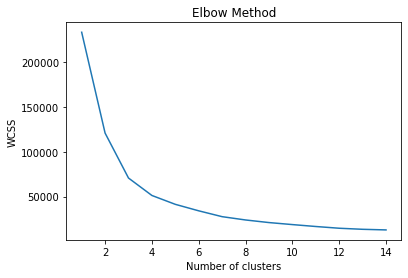

In [70]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [71]:
#test is the normalized df
kmeans = KMeans(n_clusters = 4, random_state=0, algorithm='full').fit(pca_df)


In [72]:
#add cluster assignments
pca_df['cluster']=kmeans.labels_
pca_df.cluster.value_counts()

pca_df

,pca1,pca2,cluster
0,19.901989,-11.568898,0
1,19.229805,-15.758889,0
2,16.341973,-12.222044,0
3,-3.792634,-3.718455,1
4,20.020542,-15.613759,0
...,...,...,...
245,19.296131,-11.678002,0
246,-19.452289,-22.863542,1
247,-35.802123,20.902332,3
248,28.987170,7.384181,0


In [73]:
seed_song = pd.DataFrame(rec_song_df.iloc[seed_index]).T
seed_song = seed_song[cats]


display(seed_song)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4.0,0.54,0.587,7.0,-7.982,1.0,0.0594,0.706,0.0,0.245,0.948,168.823


In [106]:
similarity = pd.DataFrame()
seed_similarity = pd.DataFrame()

def get_similarity (row,c,seed_song):
    
    min_same = seed_song[c][0] - (seed_song[c][0] * 0.34)
    max_same = seed_song[c][0] + (seed_song[c][0] * 0.34)
    
    #print(min_same, max_same)
    #print(row[c])
    if row[c] == seed_song[c][0]:
        return "="
    if row[c] < min_same:
        return '-'
    if row[c] > min_same:
        return '+'
    return '='

for c in cats:
    similarity[c] = rec_song_df.apply(lambda row: get_similarity(row,c,seed_song), axis=1)

for c in cats:
    seed_similarity[c+"_range"] = seed_song.apply(lambda row: get_similarity(row,c,seed_song), axis=1)

In [107]:
final_df = pd.concat([identifier, similarity, pca_df], axis = 1)

final_df.loc[-1] = final_df.iloc[seed_index,:]
display(final_df)
final_df.index = final_df.index + 1  # shifting index
final_df = final_df.sort_index()  # sorting by index

final_df = final_df.drop_duplicates().reset_index(drop=True).drop(['cluster'], axis=1)

#final_df

,artist,song_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pca1,pca2,cluster
0,''Sugar Boy'' Crawford,Jock-A-Mo,=,=,=,=,=,=,=,=,=,=,=,=,19.901989,-11.568898,0
1,Billy Riley & His Little Green Men,Flying Saucer Rock And Roll,-,+,+,=,-,=,+,+,+,+,+,+,19.229805,-15.758889,0
2,The Del McCoury Band,Five Flat Rocks,=,+,+,=,-,=,-,+,+,+,+,+,16.341973,-12.222044,0
3,Parliament,Up For The Down Stroke,+,=,+,+,-,=,-,+,+,+,-,+,-3.792634,-3.718455,1
4,Big John,Shakin' and Stompin',-,+,+,=,-,=,+,+,+,+,+,+,20.020542,-15.613759,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,The Flamingos,I Only Have Eyes for You,-,+,+,+,-,=,-,+,=,+,+,+,-19.452289,-22.863542,1
247,Ashley Tisdale,Lemons,+,+,+,+,-,=,+,-,+,+,+,+,-35.802123,20.902332,3
248,Nat King Cole,A Weaver Of Dreams,+,+,-,=,-,=,+,+,+,+,+,+,28.987170,7.384181,0
249,Travis Tritt,Too Far To Turn Around,+,+,+,+,-,=,-,-,+,-,-,+,-6.486522,-5.229043,1


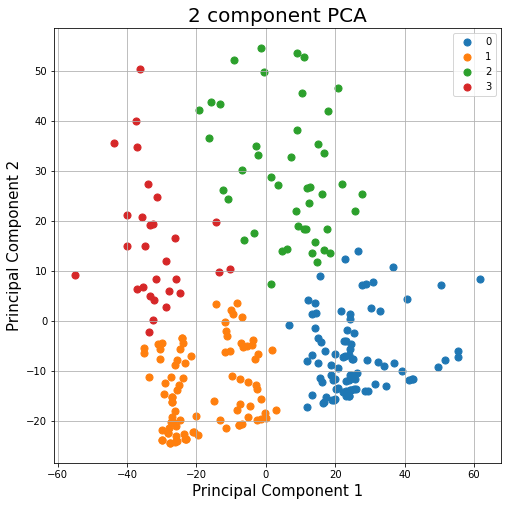

In [108]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3]
for target in targets:
    indicesToKeep = pca_df['cluster'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'pca1']
               , pca_df.loc[indicesToKeep, 'pca2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [109]:
final_df.to_csv('clustered_pca.csv', index=False)

In [ ]:
#data to share with group
#pca_df.to_csv('full_data_set_pca.csv', index=False)
cluster_pca = pca_df.loc[pca_df['cluster']==12].copy()
cluster_pca.to_csv('cluster_data_set_pca.csv', index=False)

In [ ]:
seed_index = 25 #this is the index of whatever seed song we put in
test['cluster']=kmeans.labels_

#do we want scores to only be calculated for the seed song's cluster? I think so
cluster = test.iloc[seed_index]['cluster']
cluster_df = test.loc[test['cluster']==cluster].copy()
cluster_df['scores']= linalg.norm(cluster_df.loc[cluster_df.index==seed_index].to_numpy() - cluster_df, axis=1)
#test['scores']= linalg.norm(test.iloc[seed_index] - test, axis=1)

cluster_df.reset_index(inplace=True, drop=False)
rec = cluster_df.sort_values("scores").index[:20] #number of songs in the playlist
rec = cluster_df.iloc[rec] 
rec.set_index('index')
df.iloc[rec.index][['song_name', 'artist']+cats] 
#if we want to return the closeness score, we will need to do a join rather than just filter df